In [1]:
import pandas

In [11]:
df = pandas.read_csv('auto-mpg.csv',header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
              'model year', 'origin', 'name']
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [12]:
df['model year'] += 1900
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,1970,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,1970,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,1970,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,1970,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,1970,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,1982,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,1982,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,1982,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,1982,1,ford ranger


In [18]:
df[['weight','mpg']].corr() # 상관관계 확인

,weight,mpg
weight,1.000000,-0.831741
mpg,-0.831741,1.000000


<AxesSubplot:xlabel='weight', ylabel='mpg'>

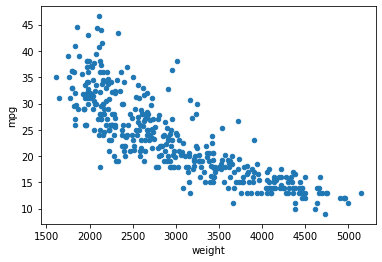

In [19]:
df.plot(x='weight', y='mpg', kind= 'scatter') # x,y 축 지정하고 산점도로 표현하기

In [30]:
# 마력에서 실수형이 아닌 것들을 찾아내보자 try구문
for x in df['horsepower'].values: 
    try:
        float(x)
    except:
        print(x)

?
?
?
?
?
?


In [36]:
# '?' 로 되어있던 값을 nan값(map() 사용해서 float형)으로 바꿔줌
from numpy import nan
df['horsepower']= df['horsepower'].replace('?',nan).map(float)

In [37]:
df['horsepower'].values

array([130., 165., 150., 150., 140., 198., 220., 215., 225., 190., 170.,
       160., 150., 225.,  95.,  95.,  97.,  85.,  88.,  46.,  87.,  90.,
        95., 113.,  90., 215., 200., 210., 193.,  88.,  90.,  95.,  nan,
       100., 105., 100.,  88., 100., 165., 175., 153., 150., 180., 170.,
       175., 110.,  72., 100.,  88.,  86.,  90.,  70.,  76.,  65.,  69.,
        60.,  70.,  95.,  80.,  54.,  90.,  86., 165., 175., 150., 153.,
       150., 208., 155., 160., 190.,  97., 150., 130., 140., 150., 112.,
        76.,  87.,  69.,  86.,  92.,  97.,  80.,  88., 175., 150., 145.,
       137., 150., 198., 150., 158., 150., 215., 225., 175., 105., 100.,
       100.,  88.,  95.,  46., 150., 167., 170., 180., 100.,  88.,  72.,
        94.,  90.,  85., 107.,  90., 145., 230.,  49.,  75.,  91., 112.,
       150., 110., 122., 180.,  95.,  nan, 100., 100.,  67.,  80.,  65.,
        75., 100., 110., 105., 140., 150., 150., 140., 150.,  83.,  67.,
        78.,  52.,  61.,  75.,  75.,  75.,  97.,  9

<AxesSubplot:xlabel='weight', ylabel='horsepower'>

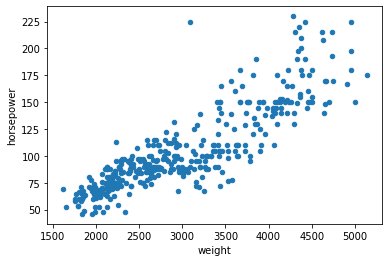

In [39]:
# 무게에 따른 마력의 산점도
df.plot(x='weight', y='horsepower',kind='scatter')

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

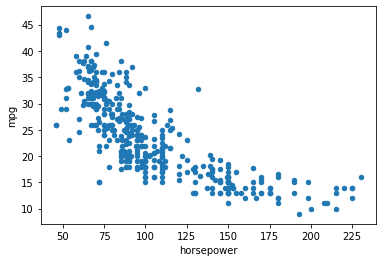

In [41]:
# 마력에 따른 연비의 산점도
df.plot(x='horsepower', y='mpg',kind='scatter')

In [47]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,1976.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,1973.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,1976.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,1979.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,3.000000


<AxesSubplot:>

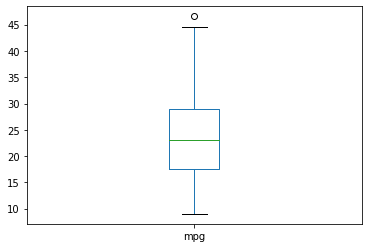

In [42]:
# 박스플롯 그래프를 이용해 이상치를 판별할 수 있음
df['mpg'].plot(kind='box')

<AxesSubplot:>

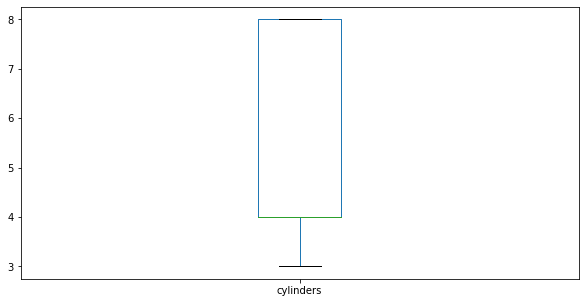

In [49]:
df['cylinders'].plot(kind='box', figsize = (10,5))